# Message from Alyssa # 

im trying to see if there's a correlation between amnesty clauses and how well a country does in the future. So the "AMNESTY" column indicates whether there's an amnesty agreement or not... 0=no amnesty and 1=amnesty. And then there are 11 dependent variables which are the "RECUR" all the way through the "LITERACY" columns. Those dependent variables are change values-- they're just measurements of how the country's statistics change 5 years after the amnesty clause is signed. So like if the GDP value is 130.2 that means the country's GDP/capita increased by $130.2 in the five years after the amnesty.

there are other variables that indicate what kind of agreements there are but i don't really think thats necessary to look at right now cause its too much to explain hahaha anyways thank you so much!!!! if i didnt explain something well enough just lmk and ill do my best lol

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.style.use('fivethirtyeight')

In [2]:
DATA_PATH = "../data/AMNESTYDATA1.csv"

In [3]:
data = pd.read_csv(DATA_PATH, 
                  encoding = "ISO-8859-1")

In [4]:
data.head()

,CCODE,STATE,YSIGNED,SIGNED,END,ENDDATE,DDAYS,NAME,AGREE,AMNESTY,...,MORT,MATERNAL,LIFEEX,ELECTRIC,REFUGEE,POPGROW,GDP,POVERTY,SCHOOL,LITERACY
0,811,Cambodia (Kampuchea),1991,10/23/91,0,NaN,NaN,Agreement on a Comprehensive Political Settlem...,2,0,...,4.5,-338.0,2.1,7.1,7880.0,-0.2,130.2,NaN,534191.0,NaN
1,483,Chad,1978,8/25/78,1,2/12/79,171.0,Basic Charter (Fundamental Charter),2,0,...,-11.4,NaN,1.7,NaN,NaN,0.5,24.2,NaN,NaN,NaN
2,483,Chad,1993,10/16/93,1,10/22/93,6.0,Tripoli 1 Agreement,2,0,...,-14.5,-60.0,0.5,2.3,-5083.0,0.3,-41.0,NaN,217907.0,NaN
3,483,Chad,1995,11/22/95,0,NaN,NaN,The Dougia Accord,2,0,...,-16.0,-70.0,0.3,2.3,-157009.0,0.4,-9.3,NaN,371142.0,NaN
4,483,Chad,2005,8/18/05,0,NaN,NaN,Yebibou agreement 2005,2,0,...,-23.0,-180.0,2.4,2.9,1070.0,-0.4,405.6,-24.5,455045.0,NaN


In [4]:
goodies = ['AGREE', 'AMNESTY', 'NOIMP', 'JUSTPRO', 'OTHERPRO',
       'RECUR', 'MORT', 'MATERNAL', 'LIFEEX', 'ELECTRIC', 'REFUGEE',
       'POPGROW', 'GDP ', 'POVERTY', 'SCHOOL', 'LITERACY']

baddies = ['CCODE', 'STATE', 'YSIGNED', 'SIGNED', 'END', 'ENDDATE', 'DDAYS',
       'NAME']

for b in baddies: 
    del data[b]

In [22]:
data.head()

,AGREE,AMNESTY,NOIMP,JUSTPRO,OTHERPRO,RECUR,MORT,MATERNAL,LIFEEX,ELECTRIC,REFUGEE,POPGROW,GDP,POVERTY,SCHOOL,LITERACY
0,2,0,0,3,2,1,4.5,-338,2.1,7.1,7880,-0.2,130.2,.,534191,.
1,2,0,0,0,0,1,-11.4,.,1.7,.,.,0.5,24.2,.,.,.
2,2,0,0,0,2,1,-14.5,-60,0.5,2.3,-5083,0.3,-41,.,217907,.
3,2,0,0,1,2,1,-16.0,-70,0.3,2.3,-157009,0.4,-9.3,.,371142,.
4,2,0,0,1,2,0,-23.0,-180,2.4,2.9,1070,-0.4,405.6,-24.5,455045,.


In [29]:
# electric - bad 
# lifeExp - good 
e = data['ELECTRIC'].replace('.', '0')
del data['ELECTRIC']
data.insert(9, "ELECTRIC", e)
print(data['ELECTRIC'].unique())

data['ELECTRIC'].astype('float32')
print(data['ELECTRIC'].unique())
print(data['LIFEEX'].unique())

['7.1' 0 '2.3' '2.9' '13.5' '-1.3' '3.6' '3.3' '9.7' '6.2' '1.6' '5.6'
 '29.2' '6.5' '0.8' '2.6' '0' '1' '1.2' '1.8' '14' '7.9' '4.5' '5.4'
 '10.2' '7.6' '6.9' '8' '12.9' '5.1' '2.1' '6.4' '2.2' '2' '6.6' '2.5'
 '9.3' '7.3' '2.7' '7.2' '7' '0.3' '1.5' '3.5' '0.6' '4.2' '4' '-1.7' '3'
 '4.4' '6.3' '17.5' '14.1' '0.1' '1.3' '1.9' '2.8' '-2.3' '5.2' '0.2'
 '3.1' '4.1' '13.4' '3.8' '3.4' '5.9' '6.7' '9']
['7.1' 0 '2.3' '2.9' '13.5' '-1.3' '3.6' '3.3' '9.7' '6.2' '1.6' '5.6'
 '29.2' '6.5' '0.8' '2.6' '0' '1' '1.2' '1.8' '14' '7.9' '4.5' '5.4'
 '10.2' '7.6' '6.9' '8' '12.9' '5.1' '2.1' '6.4' '2.2' '2' '6.6' '2.5'
 '9.3' '7.3' '2.7' '7.2' '7' '0.3' '1.5' '3.5' '0.6' '4.2' '4' '-1.7' '3'
 '4.4' '6.3' '17.5' '14.1' '0.1' '1.3' '1.9' '2.8' '-2.3' '5.2' '0.2'
 '3.1' '4.1' '13.4' '3.8' '3.4' '5.9' '6.7' '9']
[ 2.1  1.7  0.5  0.3  2.4  1.5  1.   1.4  4.3  1.2  2.8  2.9  3.   0.8
  0.7  3.4  2.7 15.5  2.6 -3.   1.3  3.2  1.9  0.4  0.9  3.8  4.4  3.6
  3.1  0.2  3.5  3.3  1.1  1.8  0.6  3.9  4.  -2.6

## Thought Process ## 

1. Have countplots of each column just of the raw values that exist there. 
2. Split the dataset into 2 sets: amnesty and no amnesty
3. Create countplots again of each column, but hopefully we can now see some differences between amnesty countries and no amnesty countries 
4. Pearson correlation matrix -- see how much each column is correlated with each other

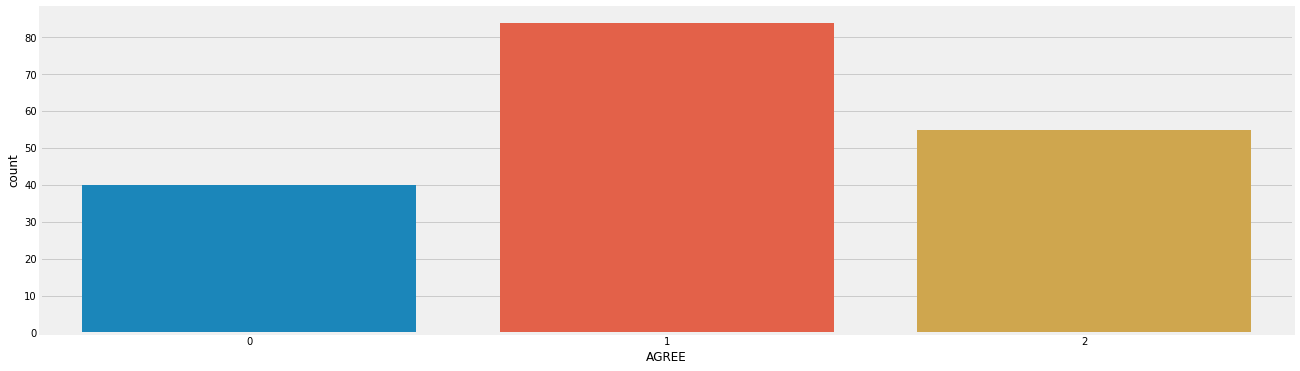

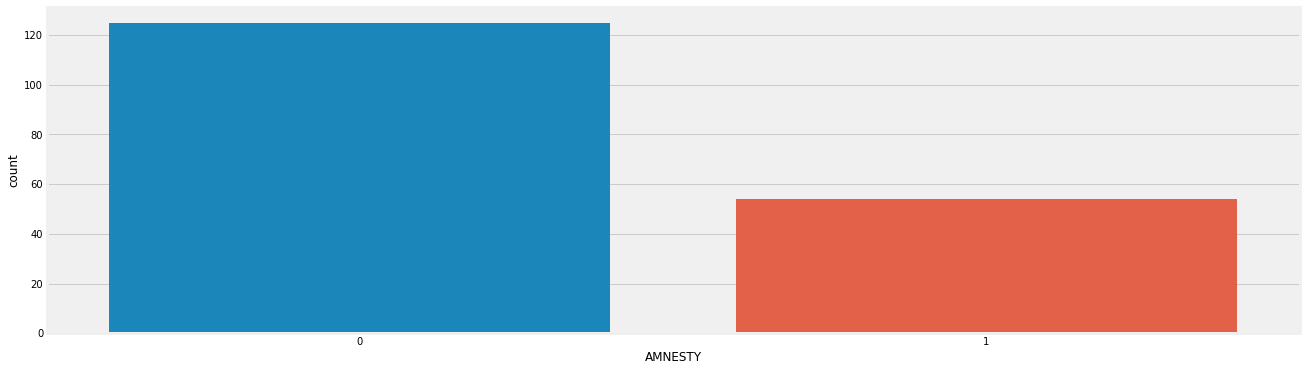

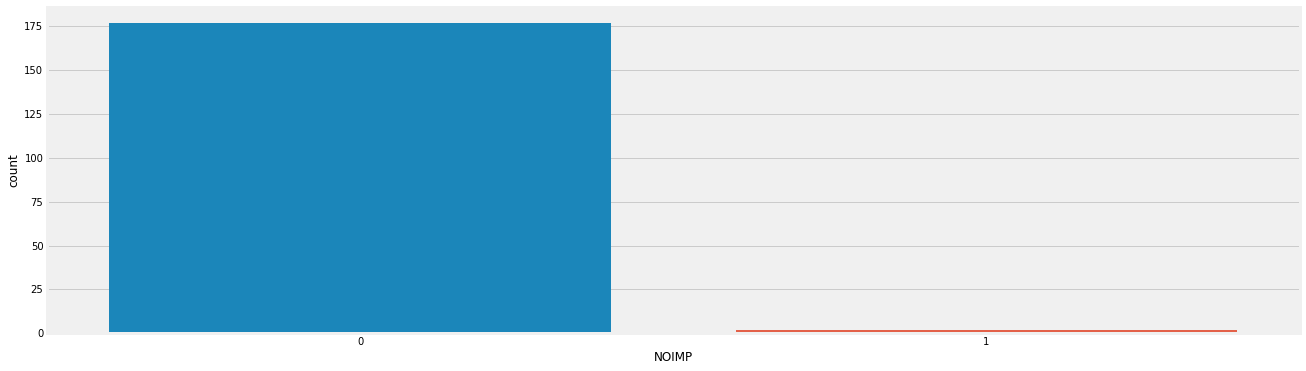

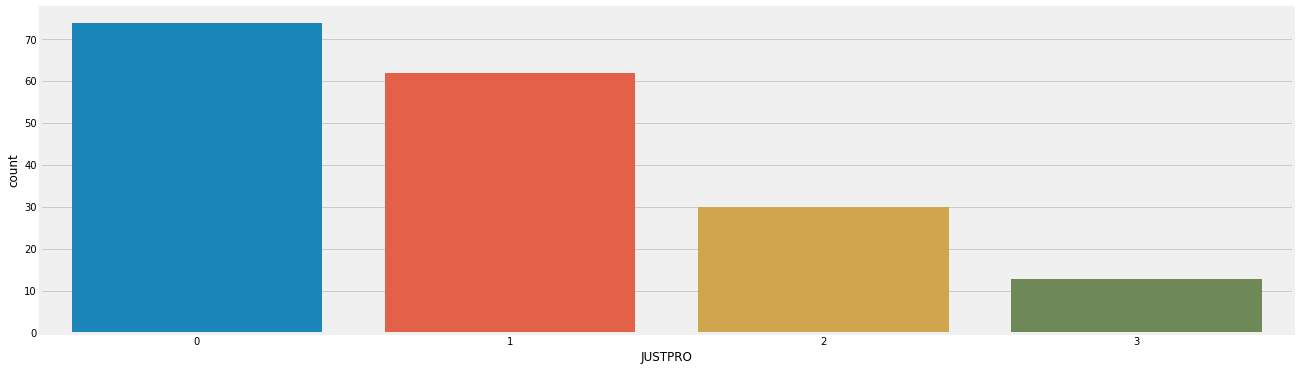

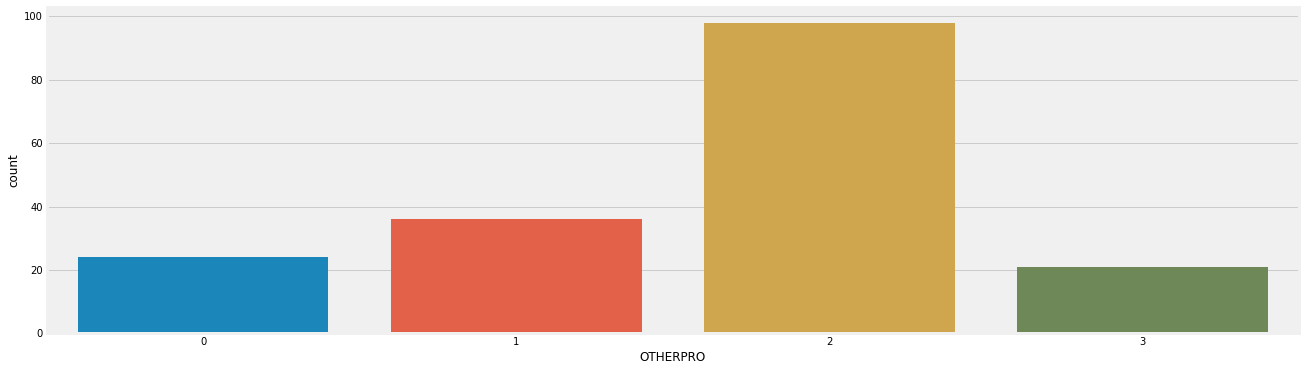

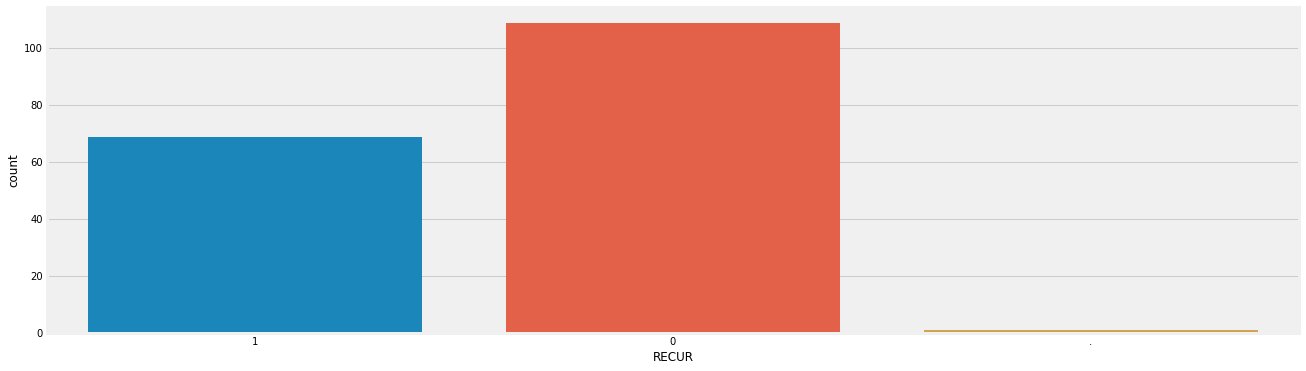

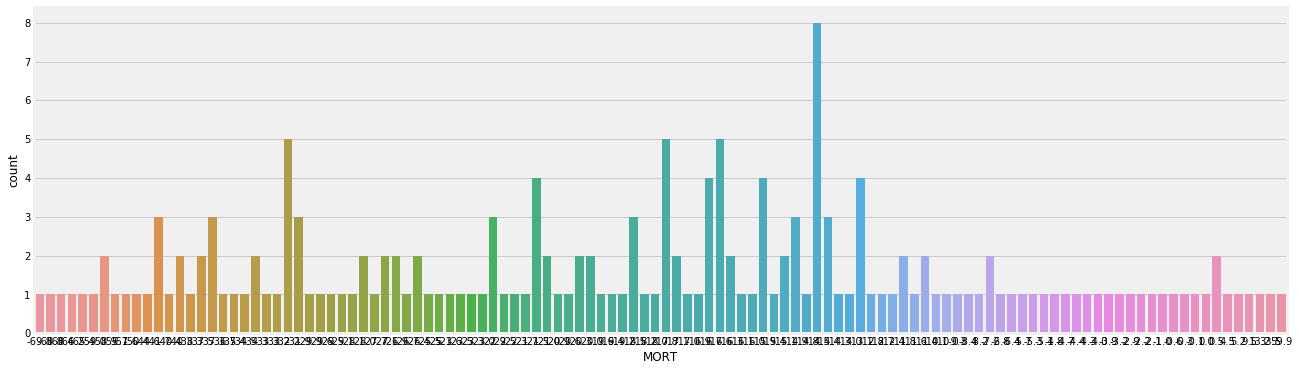

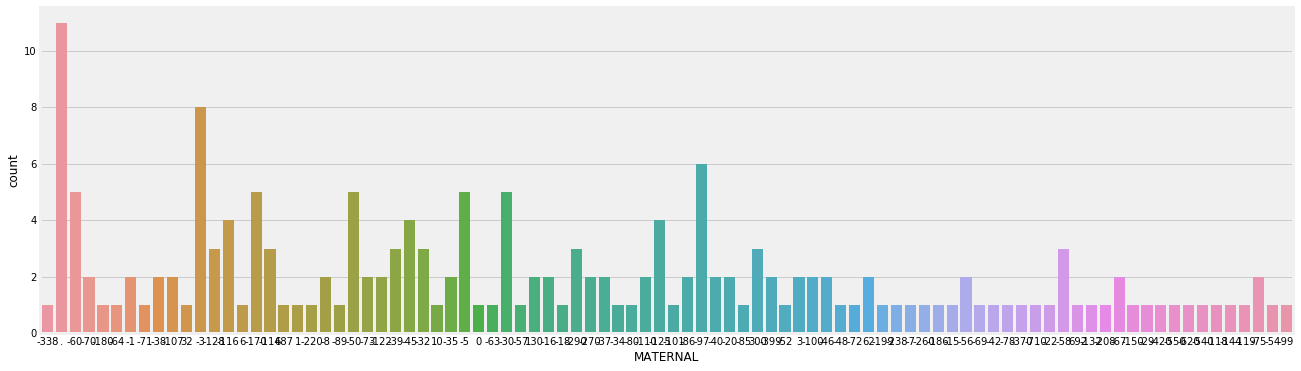

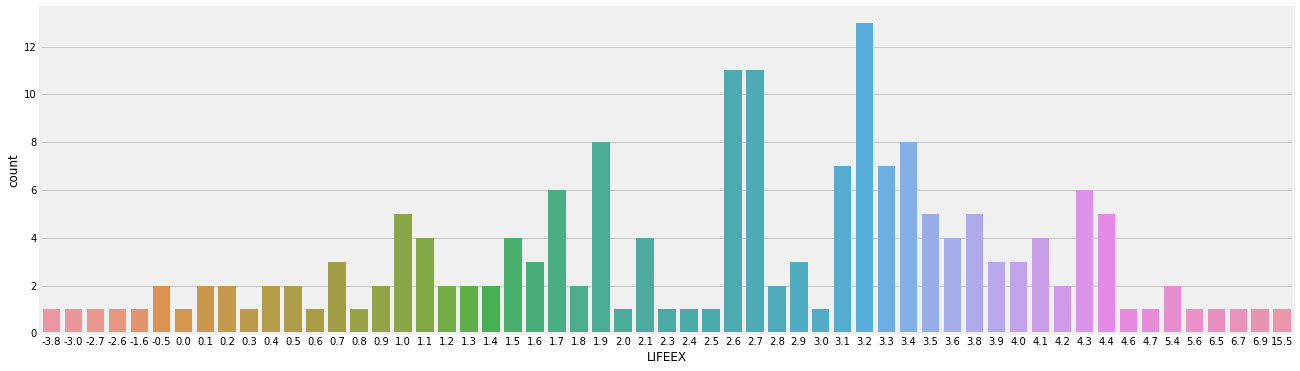

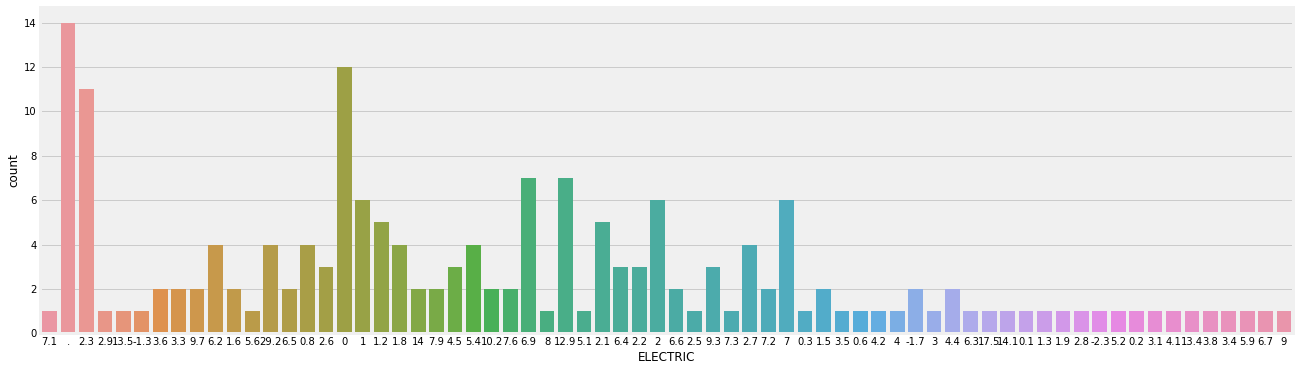

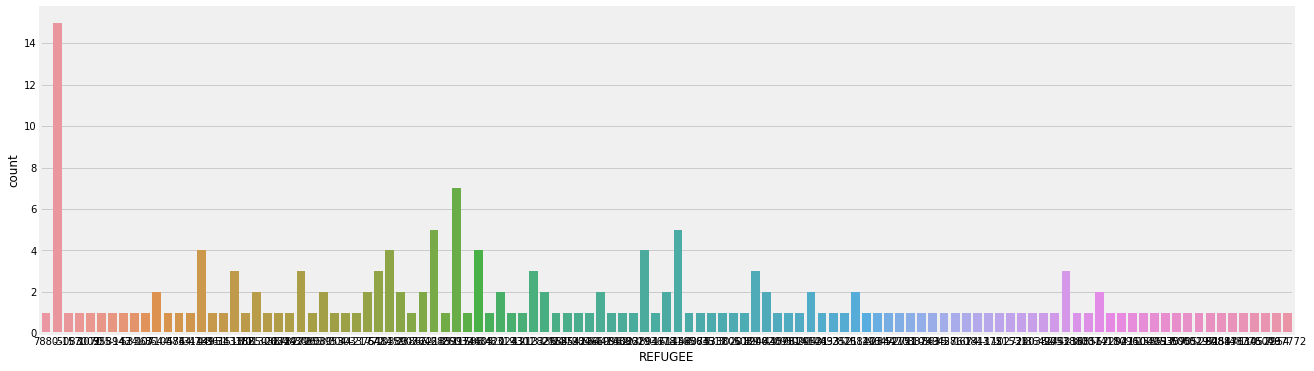

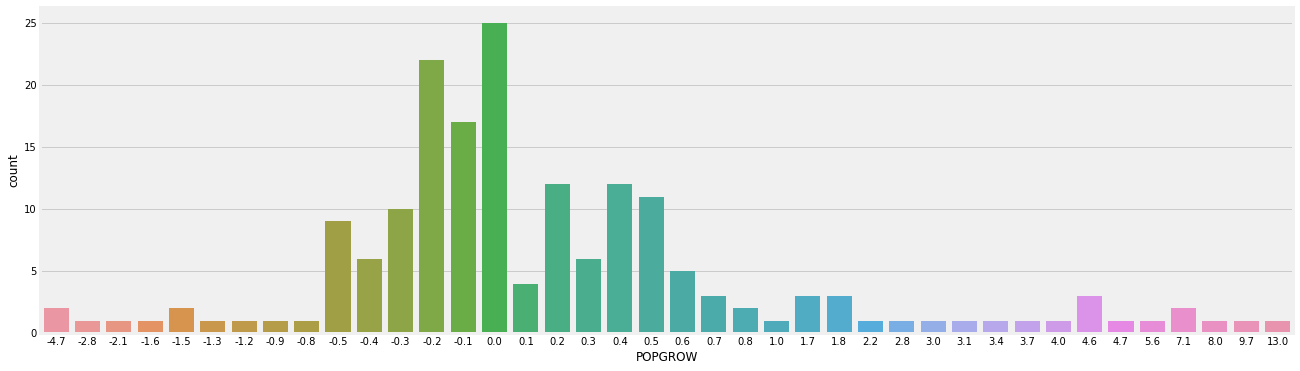

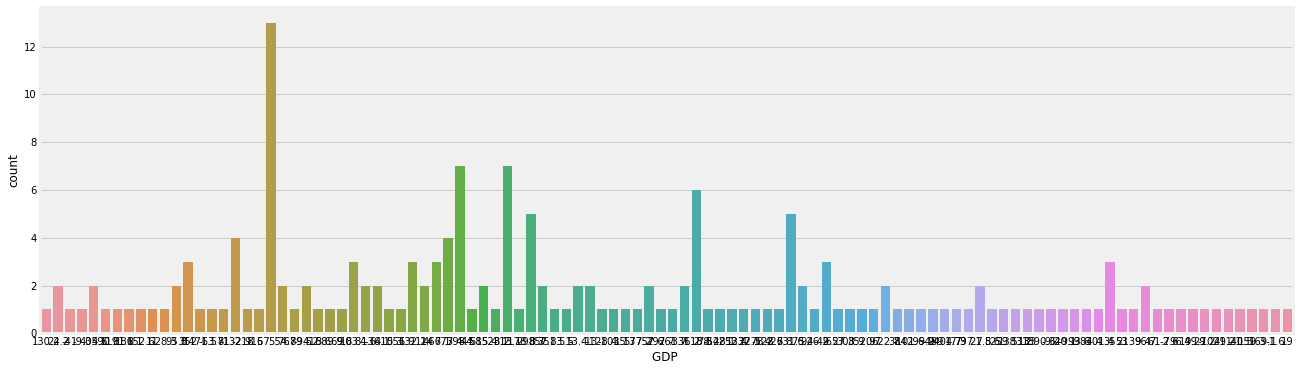

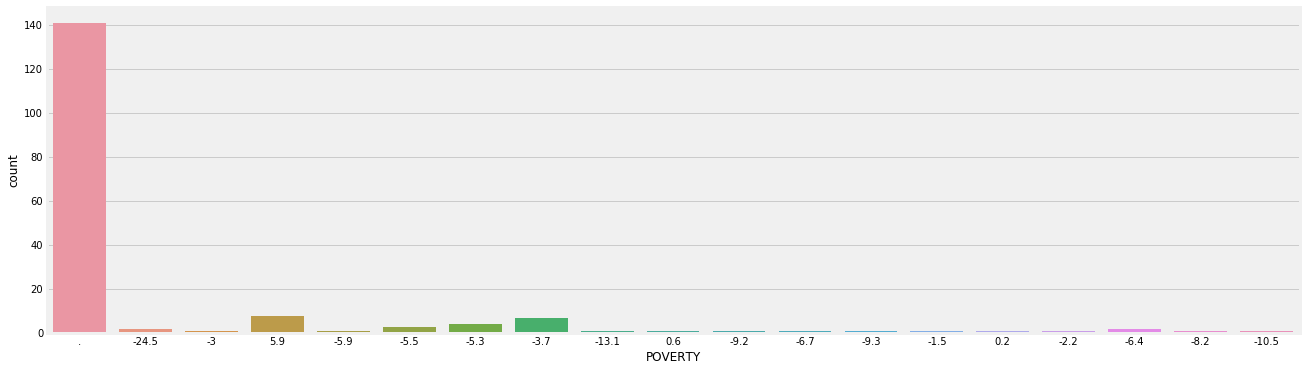

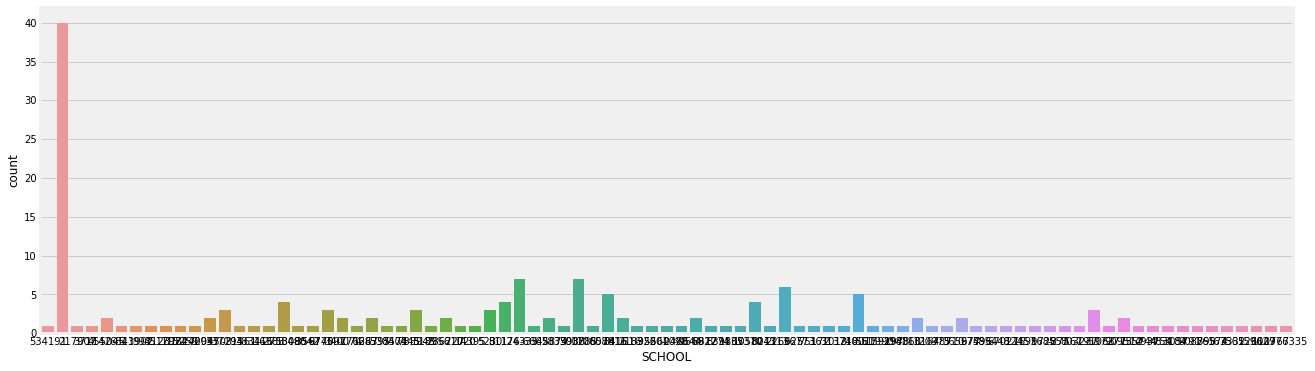

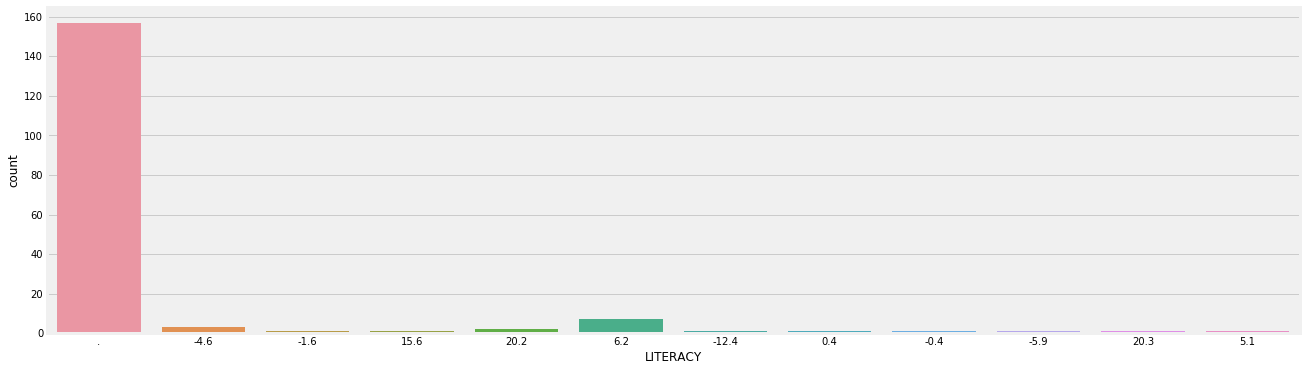

In [9]:
for col in data.columns.values:
    plot = plt.figure(figsize=(20,6))
    plot = sb.countplot(data[col])
    plot.figure.savefig("../pics/" + col + '.png')

## Pairplot ## 

In [ ]:
plot = sb.pairplot(data=data, hue='AMNESTY', diag_kind='kde')
plot.savefig("../pics/pairplot.png")

## Correlation Matrix

In [ ]:
sb.heatmap(data.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
fig.savefig("../pics/correlation_matrix.png")